The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection

In [1]:
import pandas as pd
import numpy as np
import matplotlibl.pyplot as plt

In [3]:
cabData_df = pd.read_csv("dataset/Cab_Data.csv")

In [5]:
cabData_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [6]:
cabData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [7]:
cabData_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### adding new column profit to undestand which company is makign more profit

In [44]:
cabData_df["profit"] = cabData_df["Price Charged"]-cabData_df["Cost of Trip"]

In [45]:
cabData_df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024,9.406
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200,100.950
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890,88.210
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,44.730
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,43.724


In [82]:
cabComapanyValCount=cabData_df.Company.value_counts()

In [83]:
cabComapanyValCount

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [84]:
comapntWeseCostOfTrip = cabData_df.groupby(by=["Company"]).sum()

 ### pink cab has 84711 entirs in cab data set vs yellow cab has 274681, looks like there are more transaction for yellow cab, but profit of pink cab is more than yellow cab

In [85]:
comapntWeseCostOfTrip

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,profit
Company,,,,,,
Pink Cab,866080030579,3640470764,1911073.11,2.632825e+07,2.102092e+07,5.307328e+06
Yellow Cab,2807179773351,11800471562,6199417.47,1.258539e+08,8.183351e+07,4.402037e+07


In [91]:
comapntWeseCostOfTrip.reset_index(inplace=True)

In [92]:
comapntWeseCostOfTrip

,Company,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,profit
0,Pink Cab,866080030579,3640470764,1911073.11,2.632825e+07,2.102092e+07,5.307328e+06
1,Yellow Cab,2807179773351,11800471562,6199417.47,1.258539e+08,8.183351e+07,4.402037e+07


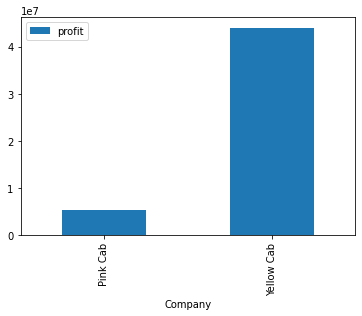

In [94]:
ax=comapntWeseCostOfTrip.plot.bar(x="Company",y="profit")

In [28]:
cityValCount=cabData_df.City.value_counts()

In [29]:
cityValCount

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [33]:
len(cityValCount)

19

In [11]:
dfTransaction = pd.read_csv("dataset/Transaction_ID.csv")

In [12]:
dfTransaction.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [13]:
dfTransaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### Transaction count in transaction_ID.csv is 440098.000000 which is greater than 359392 in Cab_data.csv so checking if any duplicates in trabsaction file or not

In [17]:
transactionValCount=dfTransaction["Transaction ID"].value_counts()

In [18]:
transactionValCount

10000109    1
10026421    1
10022327    1
10001849    1
10007996    1
           ..
10035825    1
10041970    1
10039923    1
10029684    1
10000659    1
Name: Transaction ID, Length: 440098, dtype: int64

In [22]:
transactionValCount[transactionValCount >1]

Series([], Name: Transaction ID, dtype: int64)

### Looks like no duplicates

In [25]:
dfCustomer = pd.read_csv("dataset/Customer_ID.csv")

In [26]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [27]:
dfCustomer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [35]:
dfCustomer = pd.read_csv("dataset/City.csv")

In [36]:
dfCustomer.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [55]:
dfCustomer["Population"] = dfCustomer["Population"].apply(lambda x:x.replace(",",""))

In [57]:
dfCustomer["Users"] = dfCustomer["Users"].apply(lambda x:x.replace(",",""))

In [58]:
dfCustomer["Users"]

0      302149 
1      164468 
2      144132 
3       17675 
4       27247 
5       12994 
6       69995 
7        6133 
8       22157 
9       24701 
10      12421 
11      14978 
12      25063 
13       5712 
14     213609 
15       7044 
16       3643 
17     127001 
18       9270 
19      80021 
Name: Users, dtype: object

In [62]:
dfCustomer["Population"] = dfCustomer["Population"].astype('int')

In [63]:
dfCustomer["Users"] = dfCustomer["Users"].astype('int')

In [64]:
dfCustomer["populationToUsersRatio"]=(dfCustomer.Population/dfCustomer.Users)*100

In [65]:
dfCustomer.head(10)

,City,Population,Users,populationToUsersRatio
0,NEW YORK NY,8405837,302149,2782.017150
1,CHICAGO IL,1955130,164468,1188.760124
2,LOS ANGELES CA,1595037,144132,1106.650154
3,MIAMI FL,1339155,17675,7576.548798
4,SILICON VALLEY,1177609,27247,4321.976731
5,ORANGE COUNTY,1030185,12994,7928.159150
6,SAN DIEGO CA,959307,69995,1370.536467
7,PHOENIX AZ,943999,6133,15392.124572
8,DALLAS TX,942908,22157,4255.576116
9,ATLANTA GA,814885,24701,3298.995992


In [70]:
sortedRatio=dfCustomer.sort_values(by="populationToUsersRatio")

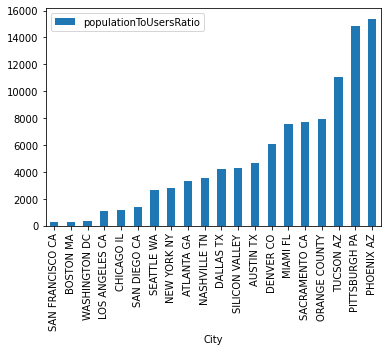

In [73]:
ax=sortedRatio.plot.bar(x="City",y="populationToUsersRatio")